# Credit Risk Analysis

#### Group 2

**Contributed by: Shubham Gupta and Anmol Poonia**

**Intoduction**

Credit risk analysis is the means of assessing the probability that a customer will default on a payment before you extend trade credit. To determine the creditworthiness of a customer, you need to understand their reputation for paying on time and their capacity to continue to do so.

Credit analysis seeks to identify the appropriate level of default risk associated with investing in that particular entity's debt instruments.

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

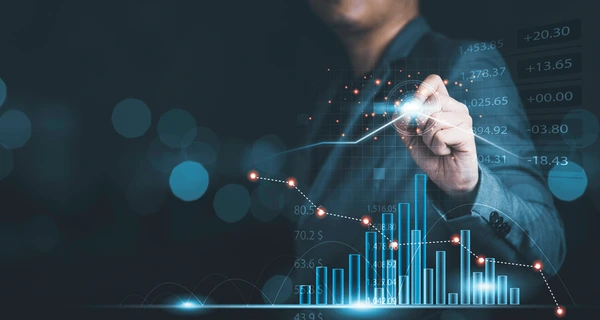

Dataset link: https://github.com/shgupta1461/Credit-Risk-Analysis

**Attributes**

Data columns (total 19 columns):
     
     Column                         
---  ------                        --------------   -----  
 1.  Loan ID                         object 
 2.  Customer ID                     object 
 3.  Loan Status                     object 
 4.  Current Loan Amount             object 
 6.  Credit Score                    float64
 7.  Annual Income                   float64
 8.  Years in current job            object 
 9.  Home Ownership                  object 
 10. Purpose                         object 
 11. Monthly Debt                    float64
 12. Years of Credit History         float64
 13. Months since last delinquent    float64
 14. Number of Open Accounts         float64
 15. Number of Credit Problems       float64
 16. Current Credit Balance          float64
 17. Maximum Open Credit             float64
 18. Bankruptcies                    float64
 19. Tax Liens                       float64

**AIM:** The project aims to take on an acceptable level of risk to advance the lenders' goals. Here we will basically explore the data to analyse the risk associated for lendig credit to a particular customer which depends on several parameters. We will determine whether the customer will be able to repay the credit loan or not using 2 ML algorithms namely Logistic regression and Random forest classification.

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#create a dataframe from dataset
df = pd.read_csv('credit_train.csv')

In [ ]:
#check number of rows and columns in dataset
print("Number of rows : ", df.shape[0])
print("Number of columns : ", df.shape[1])

In [ ]:
#check initial 5 records
df.head()

In [ ]:
#information of dataframe
df.info()

In [ ]:
#stats behind our dataframe
df.describe()

In [ ]:
#Correlation of dataframe between all columns
df.corr()

In [ ]:
sns.heatmap(df.corr().round(2), annot=True, linecolor='white', linewidth=0.2)
plt.title('Heatmap of Dataframe')

In [ ]:
#Check the relation between Current Credit balance and Monthly Debt with scatterplot
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Current Credit Balance'], y=df['Monthly Debt'], hue='Loan Status', data =df)
plt.title('Current Credit balance Vs Monthly Debt')

In [ ]:
#Check the relation between Bankruptcies and Current Loan amount with scatterplot
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Bankruptcies'], y=df['Current Loan Amount'], hue='Loan Status',  data =df)
plt.title('Bankruptcies Vs Current Loan Amount')

In [ ]:
#stat of data including object datatype
df.describe(include='object')

In [ ]:
#check the null values in dataframe
df.isna().sum()

In [ ]:
#Drop irrelevant columns
df = df.drop(columns={"Loan ID", "Customer ID"})

In [ ]:
#Remove duplicates of data
print("There are {} complete duplicate rows".format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

In [ ]:
#HANDLE OUTLIERS
num_cols = list(df.select_dtypes("float").columns)
fig = make_subplots(rows= 4, cols=3, subplot_titles=num_cols)

idx=0
for row in range(4):
    for col in range(3):
        box_trace = go.Box(x=df[num_cols[idx]], name="")
        fig.add_trace(box_trace, row=row+1, col=col+1)

        idx+=1
        if idx==len(num_cols):
            break

fig.update_layout(
    title_text='Distribution of numerical variables',
    titlefont=dict(size=22),
    showlegend=False
)

fig.show()


In [ ]:
#choose some columns to handle outliers in it
cols = ['Current Loan Amount', 'Monthly Debt', 'Credit Score', 'Annual Income', 'Current Credit Balance']

In [ ]:
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return df[(df[column] > lower) & (df[column] < upper)]


for col in cols:
     df = handle_outliers(col)

In [ ]:
fig = make_subplots(rows= 4, cols=3, subplot_titles=num_cols)

idx=0
for row in range(4):
    for col in range(3):
        box_trace = go.Box(x=df[num_cols[idx]], name="")
        fig.add_trace(box_trace, row=row+1, col=col+1)

        idx+=1
        if idx==len(num_cols):
            break

fig.update_layout(
    title_text='Distribution of numerical variables',
    titlefont=dict(size=22),
    showlegend=False
)

fig.show()

In [ ]:
#Handle Missing Values
df.isna().all(axis=1).sum()

In [ ]:
df.dropna(how="all", inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
#Replace missing values with values that comes after it
df["Credit Score"].fillna(method='bfill',axis=0, inplace=True)
df["Annual Income"].fillna(method='bfill',axis=0, inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

In [ ]:
df["Years in current job"].value_counts()

In [ ]:
df["Years in current job"].fillna("10+ years", inplace=True)

In [ ]:
df["Bankruptcies"].value_counts()
df["Bankruptcies"].fillna(0, inplace=True)

In [ ]:
df["Tax Liens"].fillna(0, inplace=True)
df["Tax Liens"].value_counts()

In [ ]:
df.isna().sum()/len(df)

In [ ]:
df.drop(columns={"Months since last delinquent"}, inplace=True)

In [ ]:
df.isna().sum()

Now all the missing values have been removed

**Categorical Variables**

In [ ]:
cat_cols = df.select_dtypes("object")
for col in cat_cols:
    print("{} values counts :\n".format(col))

    print(df[col].value_counts())
    print("------------------------------------------")
    print("------------------------------------------\n")

In [ ]:
df["Purpose"].value_counts()

In [ ]:
df["Purpose"] = df["Purpose"].replace({"other":"Other",
                                             "moving":"Other",
                                            "wedding":"Other",
                                            "Educational Expenses":"Other",
                                            "vacation":"Other",
                                            "renewable_energy":"Other"})

In [ ]:
df["Home Ownership"] = df["Home Ownership"].replace({"HaveMortgage":"Home Mortgage"})

In [ ]:
df["Home Ownership"].value_counts()

In [ ]:
#List the Home Ownership column
home_ownership = ['Home Mortgage', 'Rent', 'Own Home']

home_data = pd.Series(df["Home Ownership"]).value_counts()
plt.figure(figsize=(6,4))
plt.pie(home_data, labels = home_ownership, autopct='%.0f%%')

# Data Visualization

In [ ]:
num_cols = list(df.select_dtypes("float").columns)
fig = make_subplots(rows= 4, cols=3, subplot_titles=num_cols)

idx=0
for row in range(4):
    for col in range(3):
        box_trace = go.Histogram(x=df[num_cols[idx]], name="")
        fig.add_trace(box_trace, row=row+1, col=col+1)

        idx+=1
        if idx==len(num_cols):
            break

fig.update_layout(
    title_text='Distribution of numerical variables',
    titlefont=dict(size=22),
    showlegend=False
)

fig.show()

**What percentage of loans has been charged off?**

In [ ]:
status_counts = df["Loan Status"].value_counts()

# Define a custom color palette
color = ["#84ACA9", "#F9BC71"]

fig = px.pie(values = status_counts.values,
             names = status_counts.index,
             title = "Loan status",
             color_discrete_sequence = color
)

fig.update_traces(textinfo="percent+label", pull=[0.03, 0.03], textfont=dict(size=15))



fig.update_layout(showlegend=True,
                  title_font=dict(size=25),
                  width=600,
                  height=600)
fig.show()

22.9% loans are charged off...

**Is the larger loan amount make the loan to be charged off?**

In [ ]:
# Define a custom color palette
color = ["#54ABC5", "#EFDC71"]

# Create a box plot using Plotly Express
fig = px.box(df, x="Loan Status", y="Current Loan Amount", color="Loan Status",
             title="Current Loan Amount distribution by Loan Status",
             color_discrete_sequence=color)

fig.update_layout(title_font=dict(size=25))
fig.show()

Charged off loan amount is slightly more than the fully paid!

**How is the term related to the amount of loan?**

In [ ]:
#create separate dataframes for short term and long term
long_data = df[df["Term"]=="Long Term"]
short_data = df[df["Term"]=="Short Term"]

#custom color palette
custom_palette=["#54ABC5", "#AFDC71"]

#Create histplots for term and current loan amount
fig = make_subplots(rows=1, cols=2, subplot_titles=["Long Term", "Short Term"])

for data, col_idx, title in zip([long_data, short_data], [1, 2], ["Long Term", "Short Term"]):
    kde_trace = go.Histogram(x=data["Current Loan Amount"], nbinsx=20,
                             histnorm='probability density',
                             marker_color=custom_palette[col_idx-1])
    
    fig.add_trace(kde_trace, row=1, col=col_idx)
    
fig.update_layout(title_text="The Current Loan Amount by Term kind",
                  title_font=dict(size=25),
                  xaxis_title="Loan Amount",
                  showlegend=False)

fig.show()

From above graphs we can say that loan amount is greater for long term loans than that for short term loans.

**How is credit score related to loan status of customer ?**

In [ ]:
x1 = df[df["Loan Status"]=="Fully Paid"]["Credit Score"]
x2 = df[df["Loan Status"]=="Charged Off"]["Credit Score"]

hist_data = [x1, x2]
group_labels = ["Fully Paid", "Charged Off"]

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=["#54ABC5", "#AFDC71"])

fig.update_layout(title_text="The credit score by loan status",
                  title_font=dict(size=25),
                  xaxis_title="credit score")
fig.show()

Customers with fully paid loans has the highest credit scores

**Annual Income Vs Loan Status**

In [ ]:
x1 = df[df["Loan Status"]=="Fully Paid"]["Annual Income"]
x2 = df[df["Loan Status"]=="Charged Off"]["Annual Income"]

hist_data = [x1, x2]
group_labels = ["Fully Paid", "Charged Off"]

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=["#54ABC5", "#AFDC71"])

fig.update_layout(title_text="The Annual Income by loan status",
                  title_font=dict(size=25),
                  xaxis_title="Annual Income")
fig.show()

The above graph shows that if the customer has high annual income then there is a high chance that he will fully pay the loan amount...

**Home Ownership Vs Annual Income Vs Loan Status**

In [ ]:
def bar_percent(column):
    x = df.groupby(column)["Loan Status"].value_counts(normalize=True).reset_index(name='Percentage')
    x.Percentage = round(x.Percentage * 100, 1)
    x = x.sort_values(["Percentage", column], ignore_index=True)
    
    plt.figure(figsize=(8,6))
    
    fig = px.bar(data_frame=x, y='Percentage', x=column, color="Loan Status",
                text=x.Percentage.map(lambda x: str(x) + '%'),
                color_discrete_sequence=["#54ABC5", "#AFDC71"])
    fig.update_layout(title="{} VS Loan Status".format(column), title_x=0.5)

    fig.show()

In [ ]:
bar_percent("Home Ownership")

From above graph we can conclude that, customers with Home Mortgage are more likely to fully repay the loan as compared to other customers

In [ ]:
fig = px.box(df, x="Home Ownership", y="Annual Income",
             color="Loan Status", color_discrete_sequence=["#54ABC5", "#AFDC71"])
fig.show()

Customers with Home Mortgage has higher annual income than other customers. This help them to repay the loans on time

**What are the Purposes of taking a loan by the customers?**

In [ ]:
purpose_count = df["Purpose"].value_counts()

fig = px.bar(x=purpose_count.index,
            y=purpose_count.values,
            title="Loan Purposes Counts")

fig.update_traces(text=purpose_count.values,
                 textposition="outside")

fig.update_layout(xaxis_title="Purposes",
                  yaxis_title="Number of Customers",
                  title_font=dict(size=20),
                  font=dict(size=12)
                  
)

fig.show()

The most common purpose for taking a loan by customer is Debt Consolidation...

In [ ]:
sns.countplot(x='Loan Status', data=df)

**What is the most 3 purposes that make the loan to be charged off and the most 3 purposes that make the loan to be fully paid?**

In [ ]:
bar_percent("Purpose")

The most purposes that make the loan to be charged off are:
* Small business
* Business loan
* Medical Bills

The most purposes that make the loan to be fully paid are:
* Buy a car
* Take a trip
* Home Improvements

In [ ]:
fig = px.box(df, x="Purpose", y="Current Loan Amount",
             title="Purpose VS Current Loan Amount",
             color_discrete_sequence=["#54ABC5", "#AFDC71"])

fig.update_layout(title_font=dict(size=20),
                  font=dict(size=14))
fig.show()

The most purposes that make the loan to be fully paid have smaller loan amounts than others

In [ ]:
#Percent of customers with credit score greater than 745
column = df['Credit Score']
count = column[column > 745].count()
percent = (count/len(df))*100
print("There are ", round(percent), "% customers with credit score greater than 745...")

**ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df.info()

In [ ]:
df['Loan Status']= label_encoder.fit_transform(df['Loan Status'])

In [ ]:
df['Term']= label_encoder.fit_transform(df['Term'])

In [ ]:
df['Years in current job']= label_encoder.fit_transform(df['Years in current job'])

In [ ]:
df['Home Ownership']= label_encoder.fit_transform(df['Home Ownership'])

In [ ]:
df['Purpose']= label_encoder.fit_transform(df['Purpose'])

In [ ]:
df.info()

# Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
X = df.drop('Loan Status', axis=1)
y= df['Loan Status']

In [ ]:
sns.countplot(x=y, data=df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
lr = LogisticRegression(class_weight='balanced')
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
##Accuracy check
ml_names = ['Logistic Regression', 'Random Forest']

ml_object = [lr, rfc]

print("Accuracy of both algorithms...\n")

for i,j in zip(ml_names, ml_object):
    j.fit(X_train, y_train)
    pred = j.predict(X_test)
    print(f'{i} : {accuracy_score(y_test, pred)*100:.2f}%\n')

In [ ]:
##Logloss check

ml_names = ['Logistic Regression', 'Random Forest']

ml_object = [lr, rfc]

print("Logloss of both algorithms...\n")

for i,j in zip(ml_names, ml_object):
    j.fit(X_train, y_train)
    pred = j.predict(X_test)
    print(f'{i} : {log_loss(y_test, pred):.2f}\n')

In [ ]:
##Evaluation metrics

ml_names = ['Logistic Regression', 'Random Forest']

ml_object = [lr, rfc]

print("Classification of both algorithms...\n")

for i,j in zip(ml_names, ml_object):
    print(f'{i} Evaluation:\n')
    j.fit(X_train, y_train)
    pred = j.predict(X_test)
    print(f'{i} Classification Report: ')
    print(f'{classification_report(y_test, pred)}\n')
    
    print(f'{i} Confusion Matrix: ')
    print(f'{confusion_matrix(y_test, pred)}\n')
    print('='*70)

In [ ]:
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', square=True, xticklabels=['0','1'], yticklabels=['0','1'])

In [ ]:
rfc.fit(X_train, y_train)
rfc_pred=rfc.predict(X_test)
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, fmt='d', square=True, xticklabels=['0','1'], yticklabels=['0','1'])

# Summary

* 22.9% of loans are charged off

* Charged off loans amount is slightly more than fully paid

* Long term loan amounts is more than short term

* Customers with fully paid loans has the highest credit scores

* The higher the customer annual income, the more likely it is to repay the loan

* Customers with Home Mortgage are more likely to repay the loans than other Customers

* Customers with Home Mortgage has higher annual income than other custom. That help them to repay the loans

* The most common purposes are:

    * Debt Consolidation
    * Home Improvements
    * Business Loan
    * Buy a Car
* The most purposes that make the loan to be charged off are:

    * Small business
    * Business loan
    * Medical Bills
* The most purposes that make the loan to be fully paid are:

    * Buy a car
    * Take a trip
    * Home Improvements
* The most purposes that make the loan to be fully paid have smaller loan amounts than others